In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Social_Network_Ads.csv')

In [11]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
6,15598044,Female,27,84000,0
8,15600575,Male,25,33000,0
347,15768151,Female,54,108000,1
106,15706185,Female,26,35000,0
168,15789815,Male,29,148000,1


In [12]:
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [14]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(df.drop('Purchased', axis =1), df['Purchased'], test_size = 0.3, random_state = 42)

In [15]:
x_tr.shape , x_te.shape

((280, 2), (120, 2))

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_tr)
x_tr_sc = sc.transform(x_tr)
x_te_sc = sc.transform(x_te)

In [18]:
sc.mean_

array([3.75750000e+01, 7.05892857e+04])

In [20]:
x_tr

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [19]:
x_tr_sc

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [43]:
x_tr_sc = pd.DataFrame(x_tr_sc , columns = x_tr.columns)#converting array into datframe
x_te_sc = pd.DataFrame(x_te_sc , columns = x_te.columns)

In [44]:
x_tr_sc

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [45]:
x_tr.describe()


,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.575000,70589.285714
std,10.196005,33948.504534
min,18.000000,15000.000000
25%,30.000000,44000.000000
50%,37.000000,71000.000000
75%,45.000000,88000.000000
max,60.000000,150000.000000


In [46]:
x_tr_sc.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,-2.727977e-16,1.205385e-16
std,1.001791e+00,1.001791e+00
min,-1.923307e+00,-1.640391e+00
25%,-7.442683e-01,-7.846264e-01
50%,-5.649561e-02,1.211982e-02
75%,7.295303e-01,5.137749e-01
max,2.203329e+00,2.343340e+00


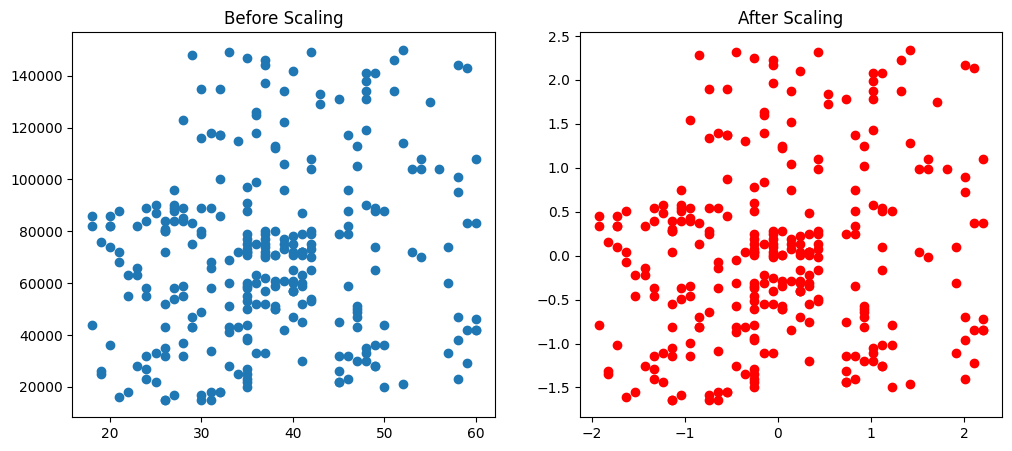

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_tr['Age'], x_tr['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_tr_sc['Age'], x_tr_sc['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

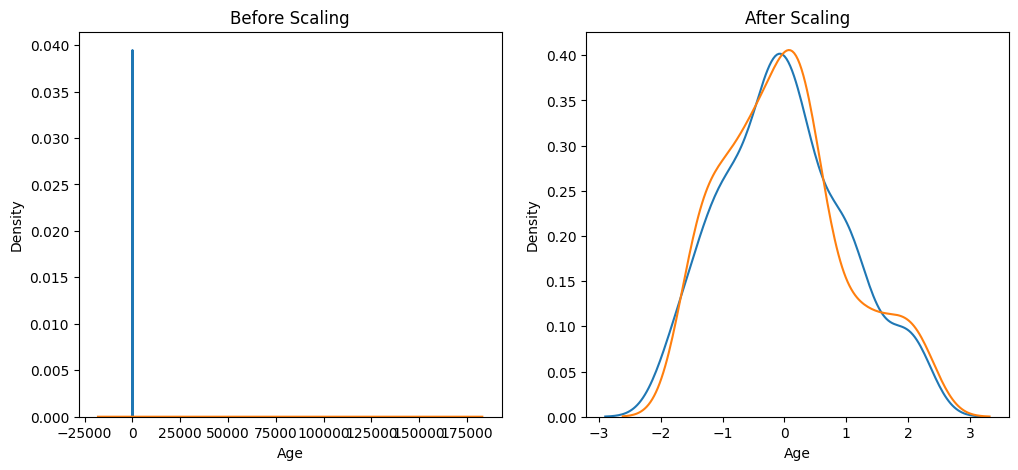

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_tr['Age'], ax=ax1)
sns.kdeplot(x_tr['EstimatedSalary'], ax=ax1)

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_tr_sc['Age'], ax=ax2)
sns.kdeplot(x_tr_sc['EstimatedSalary'], ax=ax2)

plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression


In [50]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [51]:
lr.fit(x_tr,y_tr)
lr_scaled.fit(x_tr_sc , y_tr)

LogisticRegression()

In [52]:
y_pred = lr.predict(x_te)
y_pred_scaled = lr_scaled.predict(x_te_sc)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("Actual",accuracy_score(y_te,y_pred))
print("Scaled",accuracy_score(y_te,y_pred_scaled))

Actual 0.85
Scaled 0.85


In [56]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Concatenating the dataframes
df = pd.concat([df, new_data], ignore_index=True)

print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1

[403 rows x 3 columns]


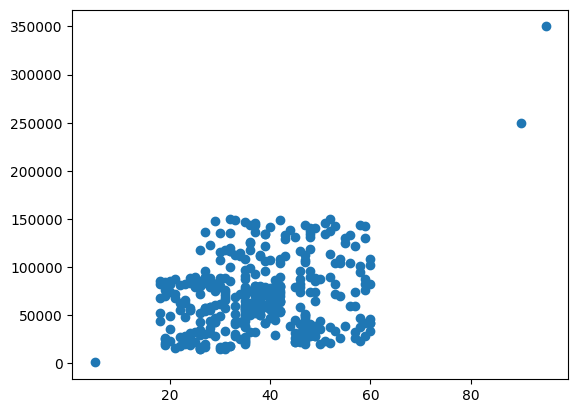

In [57]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [59]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

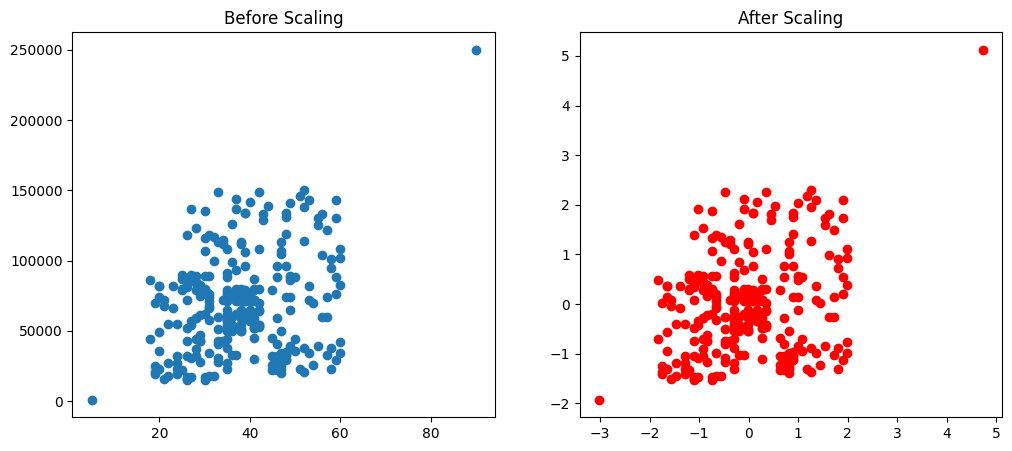

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()